Первые 5 строк:
        book_id                                    title  \
0  LR_VDQAAQBAJ                              Bestsellers   
1  WcjTDQAAQBAJ                              Bestsellers   
2  4fXUDAAAQBAJ                      The Bestseller Code   
3  yIVuDwAAQBAJ                               Bestseller   
4  2JHXwAEACAAJ  Bestsellers: Popular Fiction since 1900   

                                            subtitle  \
0  The Path (bestsellers, free bestsellers, bests...   
1  Hell: A Place Without Hope (bestseller books, ...   
2                   Anatomy of the Blockbuster Novel   
3              A Century of America's Favorite Books   
4                                                NaN   

                            authors                  publisher published_date  \
0            Ivan King, bestsellers                bestsellers     2017-01-04   
1            Ivan King, bestsellers                bestsellers     2017-01-03   
2  Jodie Archer, Matthew L. Jockers        

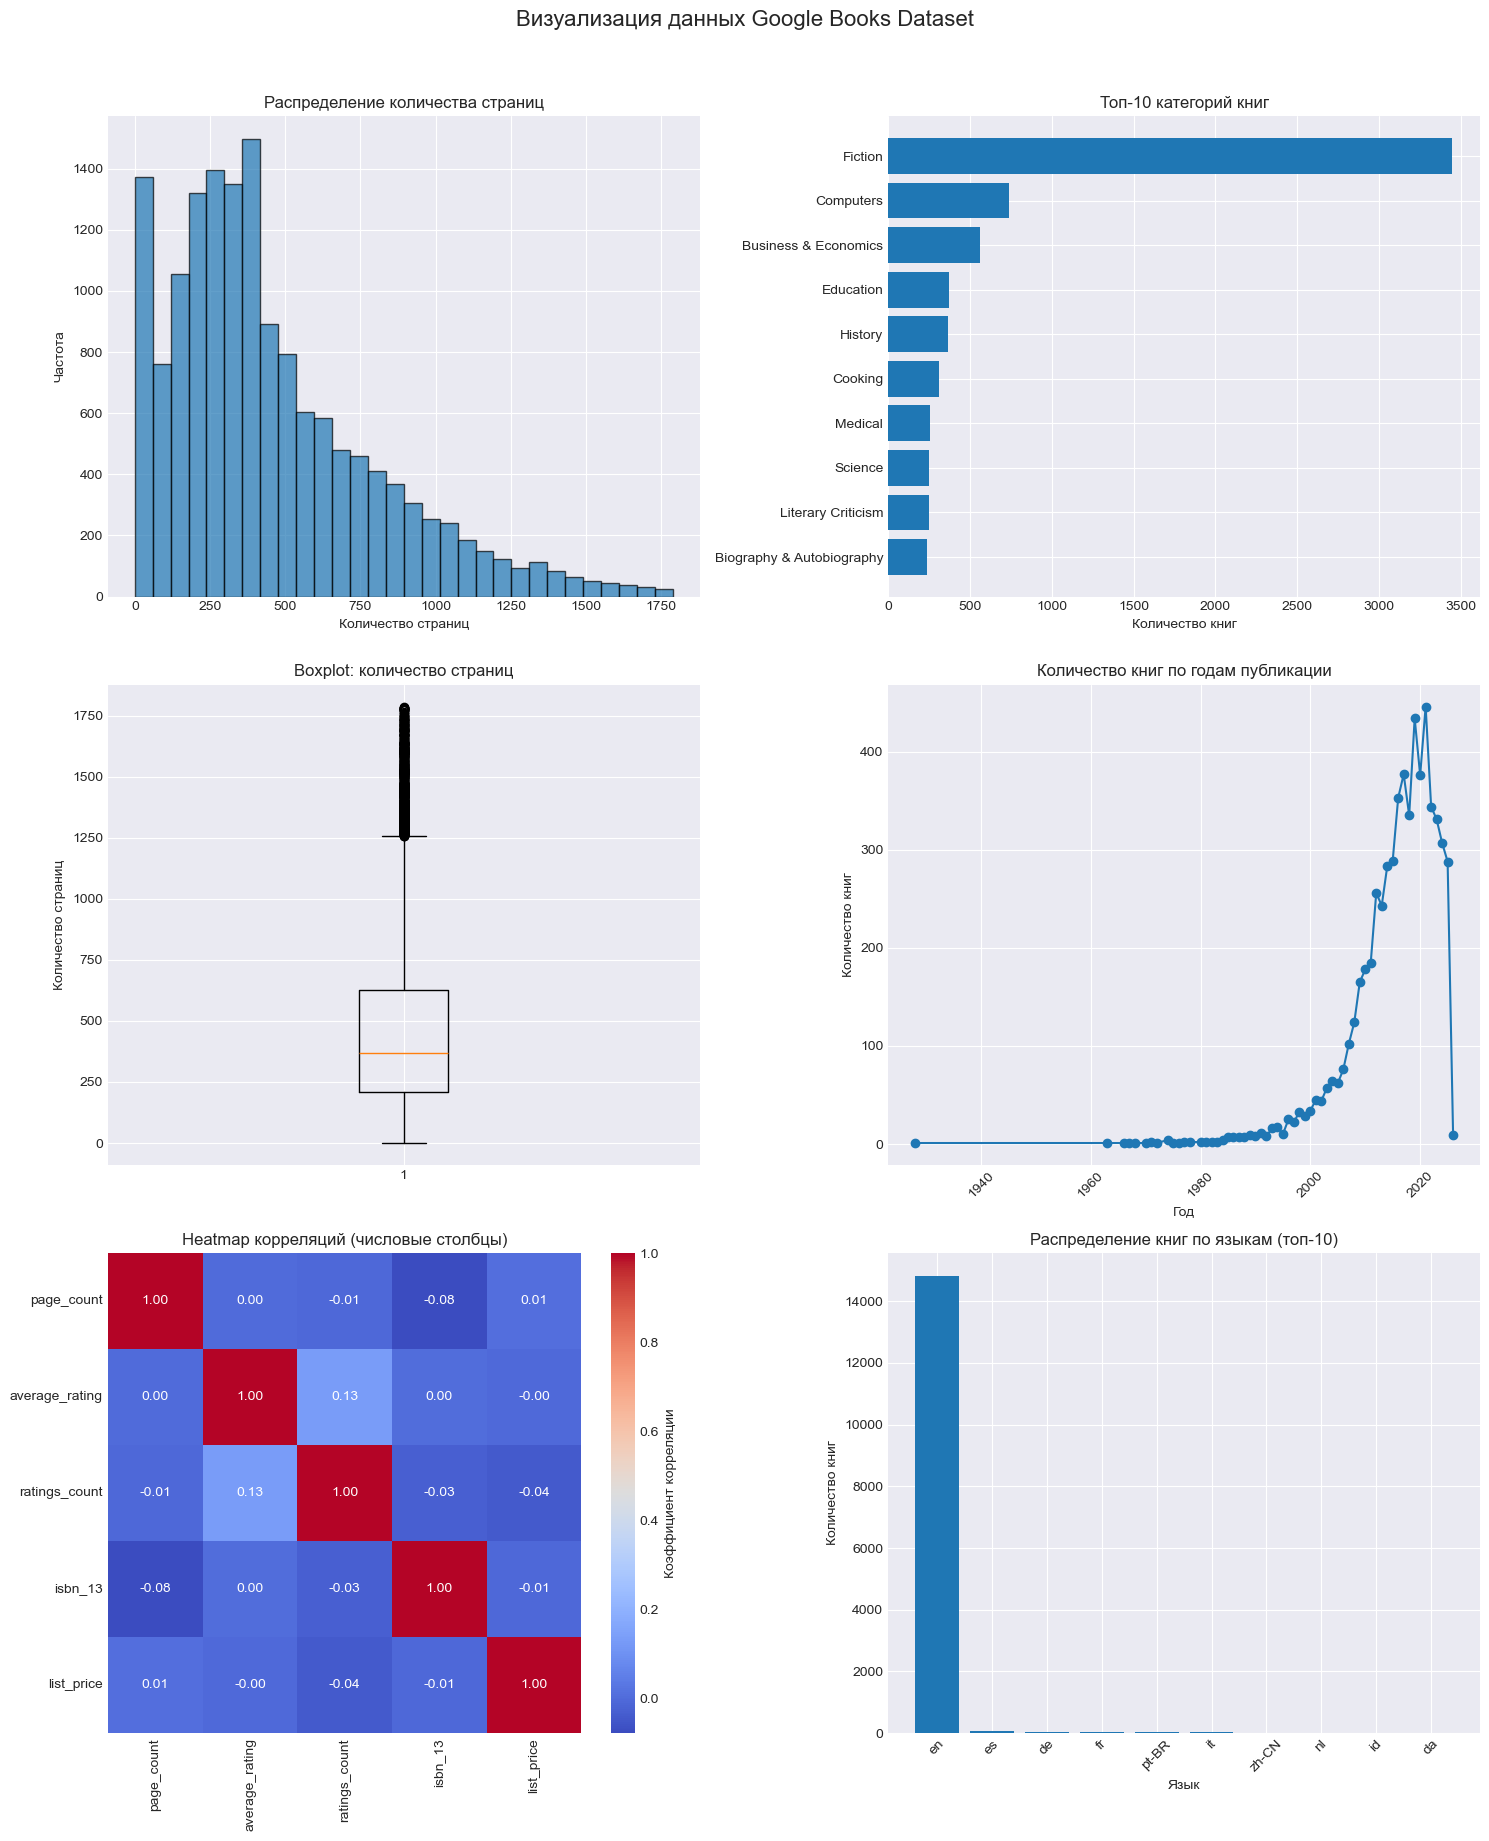



Группировки и агрегации:

1. Среднее количество страниц по категориям (топ-10):
categories
Evangelistic work              1720.0
Plant breeding                 1648.0
Shoes                          1640.0
Direct marketing               1618.0
Freight and freightage         1610.0
Virginia                       1580.0
Electric industries            1560.0
Agricultural price supports    1558.0
Glassworkers                   1554.0
Jury                           1550.0
Name: page_count, dtype: float64

2. Количество книг по издателям (топ-10):
publisher
John Wiley & Sons                              8323
Routledge                                       253
Simon and Schuster                              167
Penguin                                         134
Createspace Independent Publishing Platform     133
Springer                                        115
Springer Nature                                 110
CRC Press                                       104
Independently Published  

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# A. Загрузка и первичный обзор
df = pd.read_csv('google_books_dataset.csv')

# Первые строки
print("Первые 5 строк:")
print(df.head())
print("\n" + "="*80 + "\n")

# Последние строки
print("Последние 5 строк:")
print(df.tail())
print("\n" + "="*80 + "\n")

# Структура данных
print("Информация о датафрейме:")
print(df.info())
print("\n" + "="*80 + "\n")

# Размер датасета
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print("\n" + "="*80 + "\n")

# Типы данных
print("Типы данных:")
print(df.dtypes)
print("\n" + "="*80 + "\n")

# Проверка числовых столбцов
print("Статистика числовых столбцов:")
print(df.describe())
print("\n" + "="*80 + "\n")

# B. Обработка данных
# 1. Пропущенные значения
print("Пропущенные значения по столбцам:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nВсего пропусков: {df.isnull().sum().sum()}")

# Процент пропусков
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nПроцент пропусков по столбцам:")
print(missing_percent[missing_percent > 0])

# Заполнение пропусков в числовых столбцах медианой
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        print(f"Заполнены пропуски в {col} медианой: {df[col].median()}")

# Заполнение пропусков в категориальных столбцах модой
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col] = df[col].fillna(mode_value)
        print(f"Заполнены пропуски в {col} модой: {mode_value}")

print("\n" + "="*80 + "\n")

# 2. Дубликаты
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {duplicates}")

# Проверка дубликатов по ключевым полям
key_columns = ['title', 'authors', 'published_date']
partial_duplicates = df.duplicated(subset=key_columns, keep=False).sum()
print(f"Количество дубликатов по ключевым полям (title, authors, published_date): {partial_duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Дубликаты удалены")

print("\n" + "="*80 + "\n")

# 3. Выбросы (z-score для числовых столбцов)
print("Обработка выбросов (z-score > 3):")
for col in numeric_cols:
    if col in df.columns:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = np.where(z_scores > 3)[0]
        if len(outliers) > 0:
            print(f"Колонка {col}: {len(outliers)} выбросов")
            # Можно заменить выбросы медианой
            median_val = df[col].median()
            df.loc[df.index[outliers], col] = median_val
            print(f"  Выбросы заменены на медиану: {median_val}")

print("\n" + "="*80 + "\n")

# 4. Статистики данных
print("Описательная статистика после обработки:")
print(df.describe())
print("\n" + "="*80 + "\n")

# Уникальные значения для категориальных столбцов
print("Уникальные значения для категориальных столбцов (первые 5 столбцов):")
for col in categorical_cols[:5]:
    print(f"{col}: {df[col].nunique()} уникальных значений")
    if df[col].nunique() < 20:
        print(f"  Значения: {df[col].unique()}")

print("\n" + "="*80 + "\n")

# Корреляционный анализ для числовых столбцов
print("Корреляционная матрица (числовые столбцы):")
numeric_df = df.select_dtypes(include=[np.number])
if len(numeric_df.columns) > 1:
    correlation_matrix = numeric_df.corr()
    print(correlation_matrix)
else:
    print("Недостаточно числовых столбцов для корреляционного анализа")

print("\n" + "="*80 + "\n")

# C. Визуализация данных
# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Визуализация данных Google Books Dataset', fontsize=16, y=1.02)

# 1. Гистограмма распределения page_count
axes[0, 0].hist(df['page_count'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение количества страниц')
axes[0, 0].set_xlabel('Количество страниц')
axes[0, 0].set_ylabel('Частота')

# 2. Столбчатая диаграмма: топ-10 категорий
if 'categories' in df.columns:
    top_categories = df['categories'].value_counts().head(10)
    axes[0, 1].barh(top_categories.index, top_categories.values)
    axes[0, 1].set_title('Топ-10 категорий книг')
    axes[0, 1].set_xlabel('Количество книг')
    axes[0, 1].invert_yaxis()

# 3. Boxplot для page_count
axes[1, 0].boxplot(df['page_count'].dropna())
axes[1, 0].set_title('Boxplot: количество страниц')
axes[1, 0].set_ylabel('Количество страниц')

# 4. Линейный график: книги по годам публикации
if 'published_date' in df.columns:
    # Извлечение года из даты
    df['year'] = pd.to_datetime(df['published_date'], errors='coerce').dt.year
    books_by_year = df['year'].value_counts().sort_index()
    axes[1, 1].plot(books_by_year.index, books_by_year.values, marker='o')
    axes[1, 1].set_title('Количество книг по годам публикации')
    axes[1, 1].set_xlabel('Год')
    axes[1, 1].set_ylabel('Количество книг')
    axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Heatmap корреляций
if len(numeric_df.columns) > 1:
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                ax=axes[2, 0], cbar_kws={'label': 'Коэффициент корреляции'})
    axes[2, 0].set_title('Heatmap корреляций (числовые столбцы)')

# 6. Столбчатая диаграмма: книги по языкам
if 'language' in df.columns:
    language_counts = df['language'].value_counts().head(10)
    axes[2, 1].bar(language_counts.index, language_counts.values)
    axes[2, 1].set_title('Распределение книг по языкам (топ-10)')
    axes[2, 1].set_xlabel('Язык')
    axes[2, 1].set_ylabel('Количество книг')
    axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*80 + "\n")

# D. Группировки и агрегации
print("Группировки и агрегации:")

# 1. Среднее количество страниц по категориям (топ-10)
if 'categories' in df.columns:
    avg_pages_by_category = df.groupby('categories')['page_count'].mean().sort_values(ascending=False).head(10)
    print("\n1. Среднее количество страниц по категориям (топ-10):")
    print(avg_pages_by_category)

# 2. Количество книг по издателям (топ-10)
if 'publisher' in df.columns:
    books_by_publisher = df['publisher'].value_counts().head(10)
    print("\n2. Количество книг по издателям (топ-10):")
    print(books_by_publisher)

# 3. Сводная таблица: средний рейтинг по категориям и языкам
if all(col in df.columns for col in ['categories', 'language', 'average_rating']):
    pivot_table = pd.pivot_table(
        df, 
        values='average_rating', 
        index='categories', 
        columns='language', 
        aggfunc='mean',
        fill_value=0
    )
    print("\n3. Сводная таблица: средний рейтинг по категориям и языкам:")
    print(pivot_table.head(10))

# 4. Группировка по году публикации: статистики
if 'year' in df.columns:
    yearly_stats = df.groupby('year')['page_count'].agg(['count', 'mean', 'min', 'max']).head(10)
    print("\n4. Статистики по годам публикации (первые 10 лет):")
    print(yearly_stats)

# 5. Группировка по категориям: суммарное количество страниц
if 'categories' in df.columns:
    total_pages_by_category = df.groupby('categories')['page_count'].sum().sort_values(ascending=False).head(10)
    print("\n5. Суммарное количество страниц по категориям (топ-10):")
    print(total_pages_by_category)

print("\n" + "="*80 + "\n")

# Итоговый размер датасета
print(f"Итоговый размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"Обработанные числовые колонки: {list(numeric_cols)}")
print(f"Обработанные категориальные колонки: {list(categorical_cols)[:10]}...")  # Показываем первые 10

# Сохранение обработанного датасета
df.to_csv('google_books_dataset_processed.csv', index=False)
print("\nОбработанный датасет сохранен в файл 'google_books_dataset_processed.csv'")